## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.dtypes
    

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [2]:
merge_df['Mouse ID'].count()

1893

In [3]:
# Checking the number of mice.
mcount = merge_df['Mouse ID'].nunique()
mcount


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_df


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all = merge_df[merge_df['Mouse ID'] == 'g989']
all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mcount2 = clean_df['Mouse ID'].nunique()
mcount2

248

In [8]:
#different drugs
unique_drugs = clean_df['Drug Regimen'].unique()
unique_drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
#extract drug regimen and tumor volume from dataframe
short_df = clean_df[['Drug Regimen','Tumor Volume (mm3)' ]]
short_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [10]:
#groupby drug regimen.  display mean of tumor volume per drug
drugs_short_df = short_df.groupby(['Drug Regimen'])

#round(drugs_short_df.mean(),3)
drugs_short_df

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = drugs_short_df['Tumor Volume (mm3)'].mean()
tumor_median = drugs_short_df['Tumor Volume (mm3)'].median()
tumor_var = drugs_short_df['Tumor Volume (mm3)'].var()
tumor_stdev = drugs_short_df['Tumor Volume (mm3)'].std()
tumor_sem = drugs_short_df['Tumor Volume (mm3)'].sem()

#create dataframe
tumor_df = pd.DataFrame({'Tumor Volume Mean':tumor_mean,
                         'Tumor Volume Median':tumor_median,
                         'Tumor Volume Variance':tumor_var,
                         'Tumor Volume Standard Deviation':tumor_stdev,
                         'Tumor Volume Standard Error of the Mean':tumor_sem    
})
tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_df = drugs_short_df.agg(['mean','median', 'var', 'std', 'sem'])

agg_tumor_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

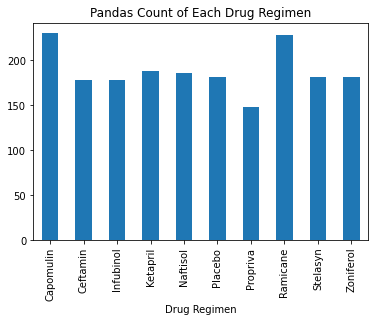

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_counts = short_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()
drug_counts
plt.title("Pandas Count of Each Drug Regimen")
ax = drug_counts.plot.bar(x='Drug Regimen',y='Tumor Volume (mm3)')
ax
plt.show()


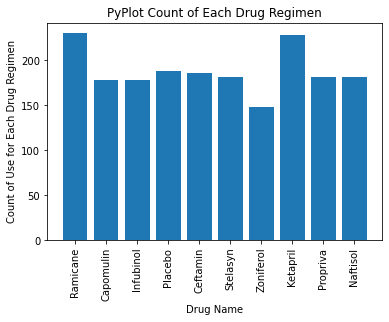

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#x=short_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()

x_axis=np.arange(len(unique_drugs))

#print(labels)
#plt.bar(x_axis,unique_drugs)#drug_counts)
plt.bar(unique_drugs, drug_counts)
plt.xticks(unique_drugs,rotation='vertical')
plt.title("PyPlot Count of Each Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Count of Use for Each Drug Regimen")
plt.show()


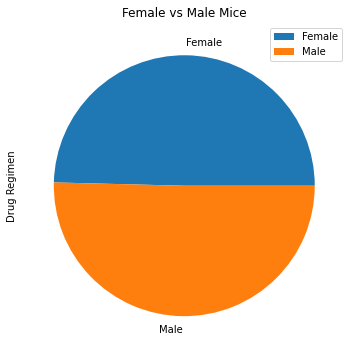

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df.groupby(['Sex','Mouse ID']).count()
gender.groupby(['Sex']).count()

pie_gender = gender.groupby(['Sex']).count().plot(kind="pie", y='Drug Regimen',title='Female vs Male Mice',figsize=(11,6))
plt.show()


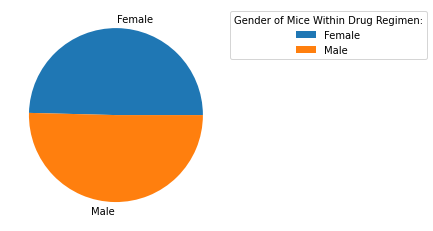

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y=np.array([123,125])
gender_labels = ['Female', 'Male']
plt.pie(y, labels = gender_labels)
plt.legend(bbox_to_anchor=(1,1),title = 'Gender of Mice Within Drug Regimen:')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
dftest = clean_df.groupby('Mouse ID', as_index=False).max()
dftest

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,45.000000,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes  
  
    # add subset 
        
    # Determine outliers using upper and lower bounds
    

In [26]:
max_tumor_df = clean_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_list.append(final_tumor_vol)
    #     # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
    print() 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



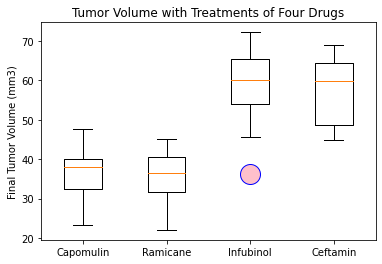

In [27]:
plt.title('Tumor Volume with Treatments of Four Drugs')
outliers = dict(markerfacecolor='pink',markersize=20, markeredgecolor='blue')
plt.boxplot(tumor_vol_list, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tp_tv = clean_df[clean_df['Mouse ID'].isin(['s185'])]
tp_tv

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [29]:
tp_tv_data = tp_tv[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
tp_tv_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


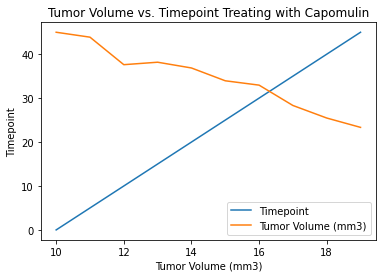

In [42]:
line_plot = tp_tv_data.plot.line()
line_plot
plt.title('Tumor Volume vs. Timepoint Treating with Capomulin')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]
cap


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [32]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_average_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


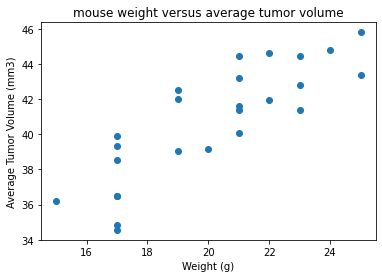

In [33]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('mouse weight versus average tumor volume')
plt.show()


## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


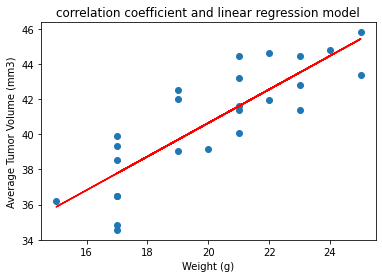

In [37]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()

corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])

y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('correlation coefficient and linear regression model')
plt.show()